## Flight Price:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

In [171]:
flight_df = pd.read_excel("data/flight_price.xlsx")
rows, columns = flight_df.shape
print(f"Dimensions of flight dataset : {flight_df.shape}")
print(f"Number of rows in flight dataset : {rows}")
print(f"Number of columns  in flight dataset : {columns}")

Dimensions of flight dataset : (10683, 11)
Number of rows in flight dataset : 10683
Number of columns  in flight dataset : 11


### Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.

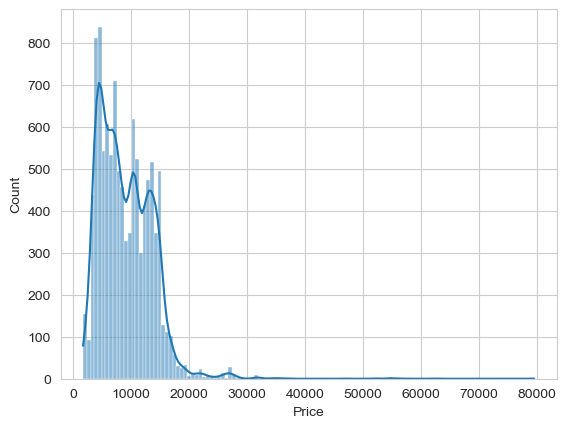

In [172]:
sns.histplot(x='Price', data = flight_df, kde=True);

In [127]:
flight_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

### Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [173]:
print(f"Maximum Price of a flight ticket : {flight_df['Price'].max()}")
print(f"Maximum Price of a flight ticket : {flight_df['Price'].min()}")
print(f"Range of a flight ticket : {flight_df['Price'].max() - flight_df['Price'].min()}")

Maximum Price of a flight ticket : 79512
Maximum Price of a flight ticket : 1759
Range of a flight ticket : 77753


### Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.

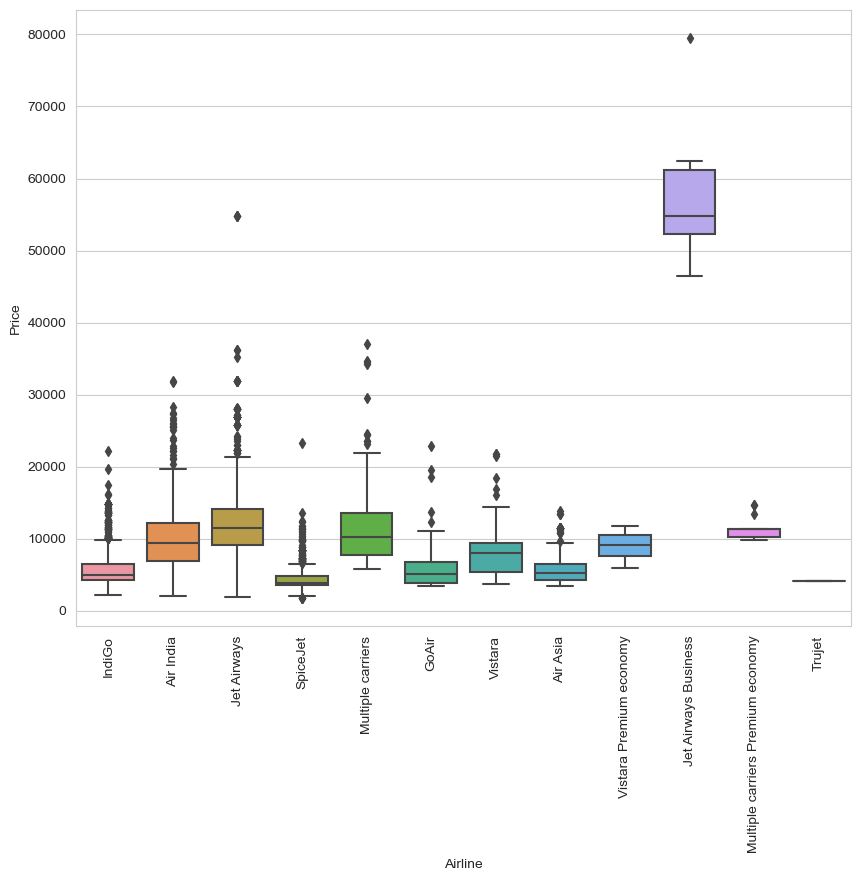

In [174]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Airline', y='Price', data=flight_df)
plt.xticks(rotation=90)
plt.show()

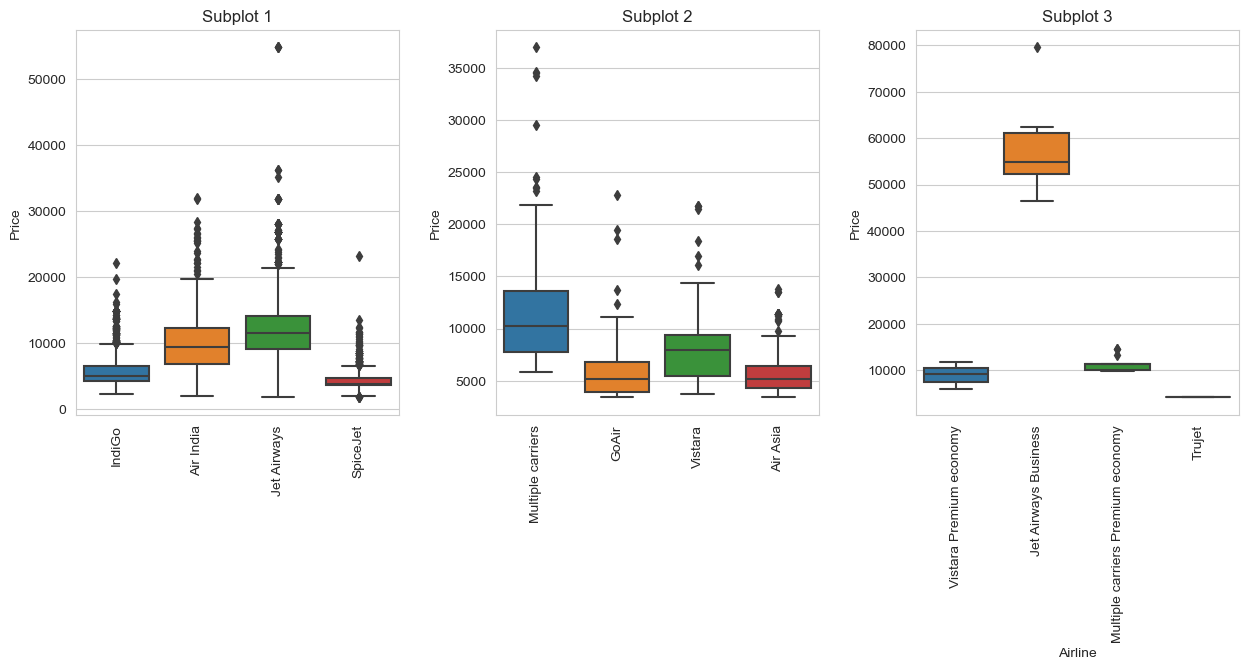

In [175]:
# Create a list of the 4 airlines to be plotted in each subplot
airlines = airlines =flight_df['Airline'].unique()

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Loop over the subplots and plot the boxplots for 4 airlines in each subplot
for i, ax in enumerate(axs):
    # Get the data for the 4 airlines to be plotted in this subplot
    airlines_subset = airlines[i*4:(i+1)*4]
    airline_data = flight_df.loc[flight_df['Airline'].isin(airlines_subset), :]
    
    # Plot the boxplots for the 4 airlines in this subplot
    sns.boxplot(x='Airline', y='Price', data=airline_data, ax=ax)
    
    # Set the title and y-axis label for this subplot
    ax.set_title('Subplot {}'.format(i+1))
    ax.set_ylabel('Price')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
    # Remove the x-axis label for all but the bottom subplot
    if i != 2:
        ax.set_xlabel('')
        
# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()

### Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

Yes there are outliers in the dataset as we see from the above image for most of thr airlines we have outliers.



Identifying potential outliers is important because they can have a significant impact on your analysis. Outliers can skew summary statistics such as the mean and standard deviation, making them less representative of the true data. They can also affect the results of statistical tests, leading to incorrect conclusions.

If outliers are due to measurement errors or data entry errors, it may be appropriate to remove them from the dataset. However, if the outliers are real-world anomalies, they may provide valuable insights into the dataset and should be kept in the analysis.

### Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

First we will extract the month column from the 'Date_of_Journey' column.
For that first we need to change the format of the column to data time and then
use it to extract the month from the dates

Then plot a simple hist graph to see which month gets the highest bookings.

From our graph below we get that `May` month see the highest bookings

In [176]:
flight_df['Date_of_Journey'] = pd.to_datetime(flight_df['Date_of_Journey'],
                                             format='%d/%m/%Y')
flight_df['Journey_Month'] = flight_df["Date_of_Journey"].dt.strftime('%B')
flight_df['Journey_Year'] = flight_df["Date_of_Journey"].dt.year
flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,March,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,May,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,June,2019
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,May,2019
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,March,2019


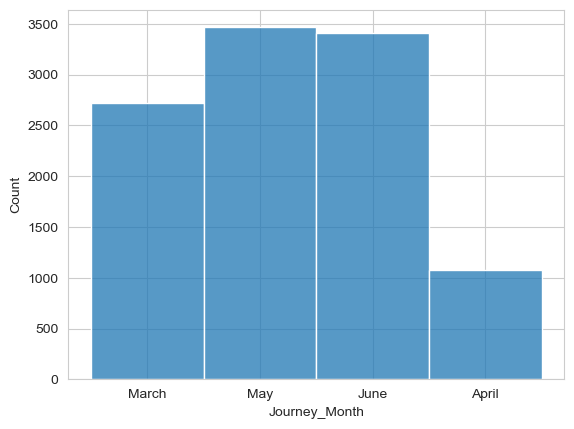

In [177]:
sns.histplot(x='Journey_Month', data=flight_df)
plt.show()

### Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?


For Flight Prices analysis:

1. Prices vs date

2. Price vs Airline

3. Prices wrt Duration

4. Prices vs Months

5. Prices vs Source

6. Prices vs total stops


We can use scatterplots for basic insights to get wrt to prices and various features 

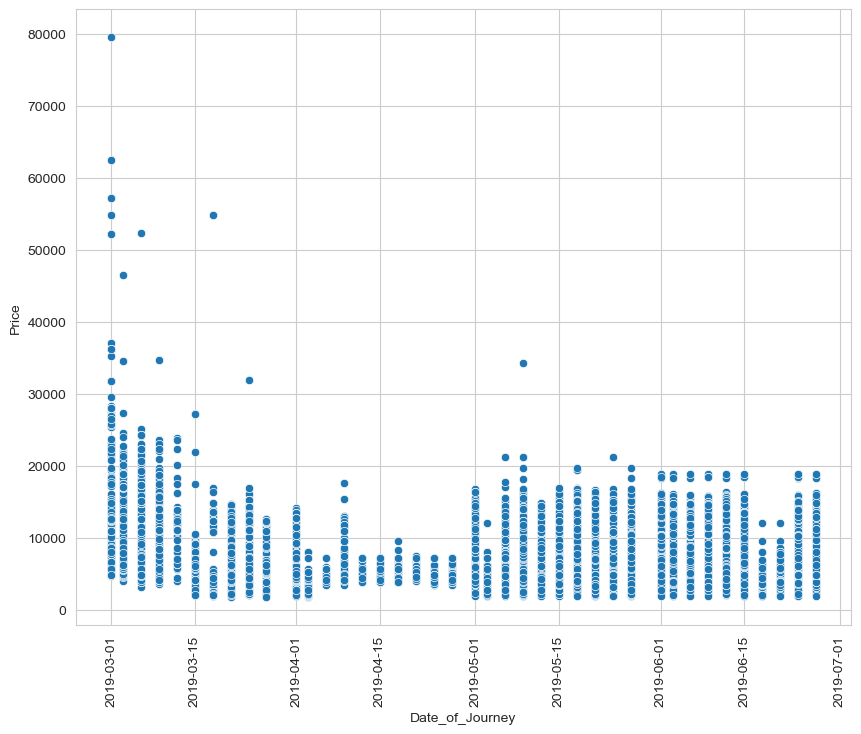

In [205]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Date_of_Journey',y='Price',data=flight_df)
plt.xticks(rotation=90)
plt.show()

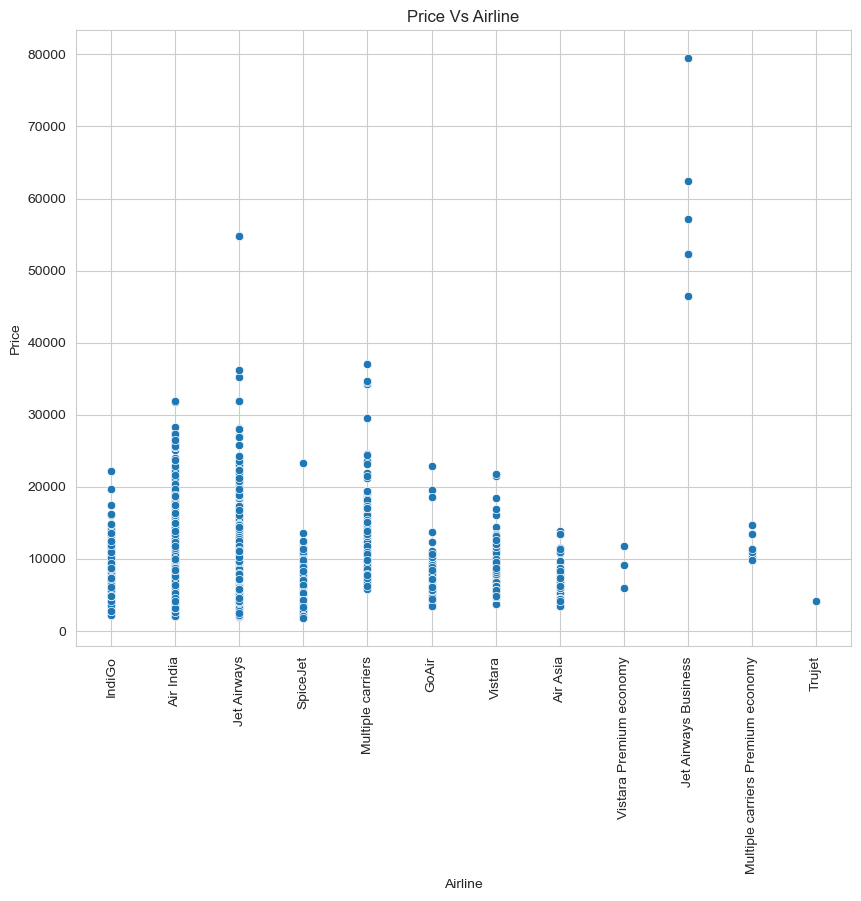

In [206]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Airline',y='Price',data=flight_df)
plt.xticks(rotation=90)
plt.title("Price Vs Airline")
plt.show()

In [180]:
# Convert Duration column to datetime format
flight_df['Duration'] = flight_df['Duration'].apply(lambda x: x.replace(' ', '')) # Remove spaces
flight_df['Duration'] = pd.to_datetime(flight_df['Duration'], format='%Hh%Mm', errors='coerce')

# Extract hours and minutes separately
flight_df['Duration_hours'] = flight_df['Duration'].dt.hour
flight_df['Duration_minutes'] = flight_df['Duration'].dt.minute

# Set minutes to 0 if not present
flight_df.loc[flight_df['Duration_minutes'].isna(), 'Duration_minutes'] = 0

# Calculate total duration in minutes
flight_df['Duration_minutes_total'] = flight_df['Duration_hours'] * 60 + flight_df['Duration_minutes']

# Drop the intermediate columns
flight_df = flight_df.drop(['Duration', 'Duration_hours', 'Duration_minutes'], axis=1)


In [183]:
flight_df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Year,Duration_minutes_total
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897,March,2019,170.0


In [185]:
stops_map = {'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4,'Nan':np.nan}
flight_df['Total_Stops'] = flight_df['Total_Stops'].map(stops_map)


In [186]:
flight_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Year,Duration_minutes_total
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,0.0,No info,3897,March,2019,170.0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2.0,No info,7662,May,2019,445.0


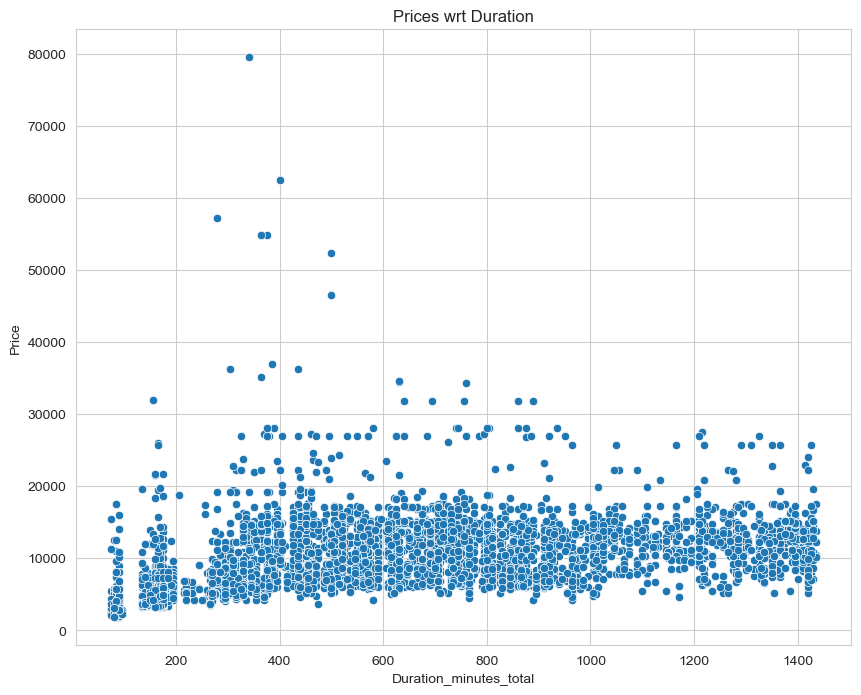

In [208]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Duration_minutes_total', y='Price', data=flight_df,)
plt.title("Prices wrt Duration")
plt.show()

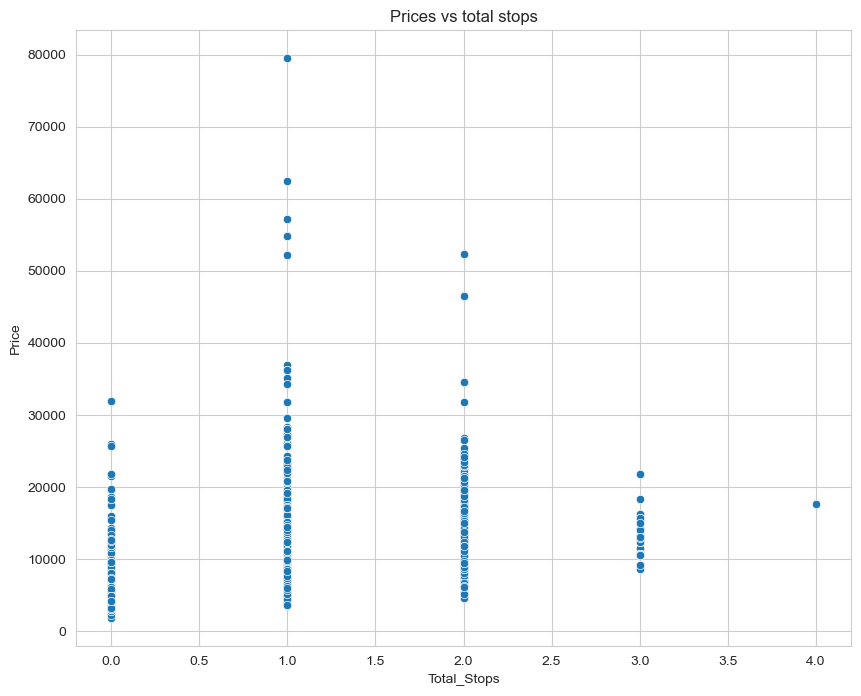

In [196]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Total_Stops', y='Price', data=flight_df)
plt.title("Prices vs total stops")
plt.show()

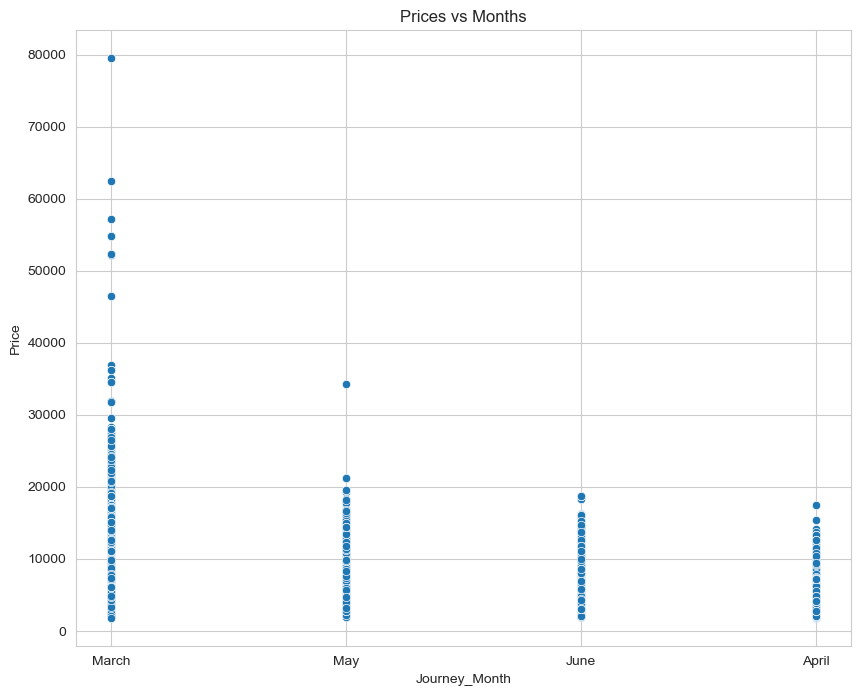

In [198]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Journey_Month', y='Price', data=flight_df)
plt.title("Prices vs Months")
plt.show()

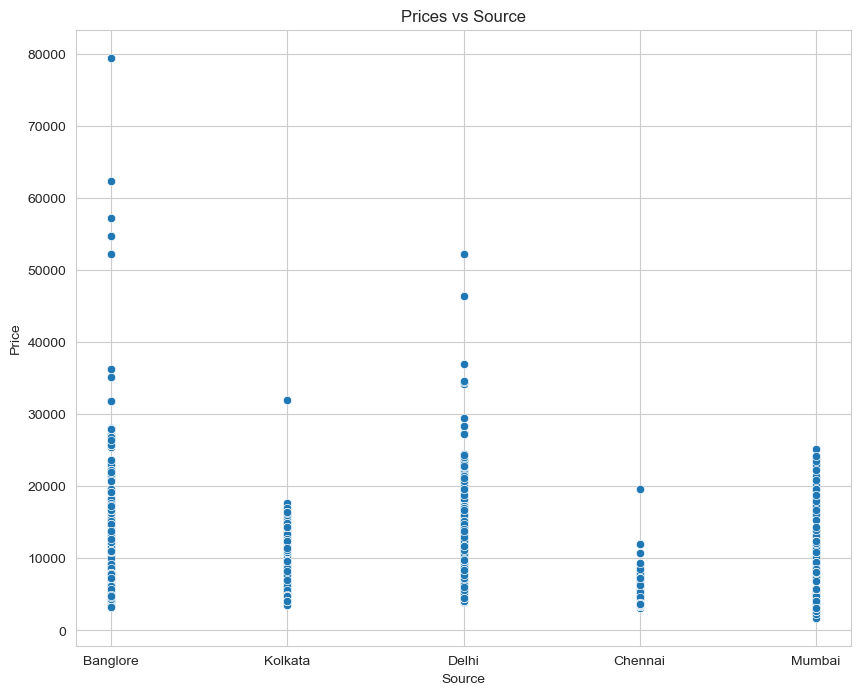

In [211]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Source', y='Price', data=flight_df)
plt.title("Prices vs Source")
plt.show()

### Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

I would present the findings in graphs format so it would be easy to interpret


For Flight Prices analysis:

1. Prices vs date  - Prices tend to be higher in march and then come down in april and may

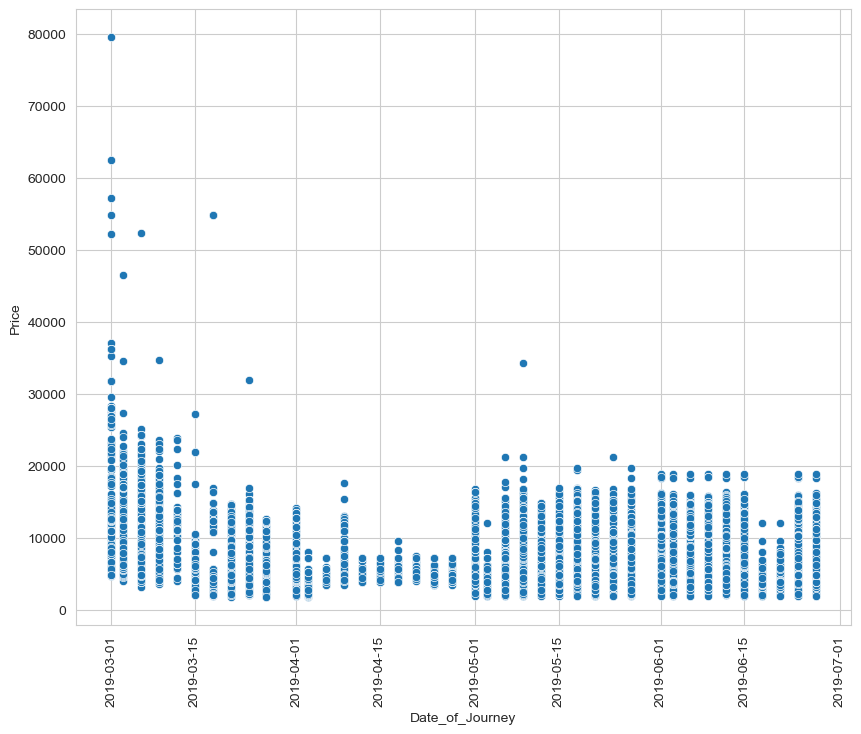

2. Price vs Airline - we have few budget airlines like spiceget indigo and few high price airlines too

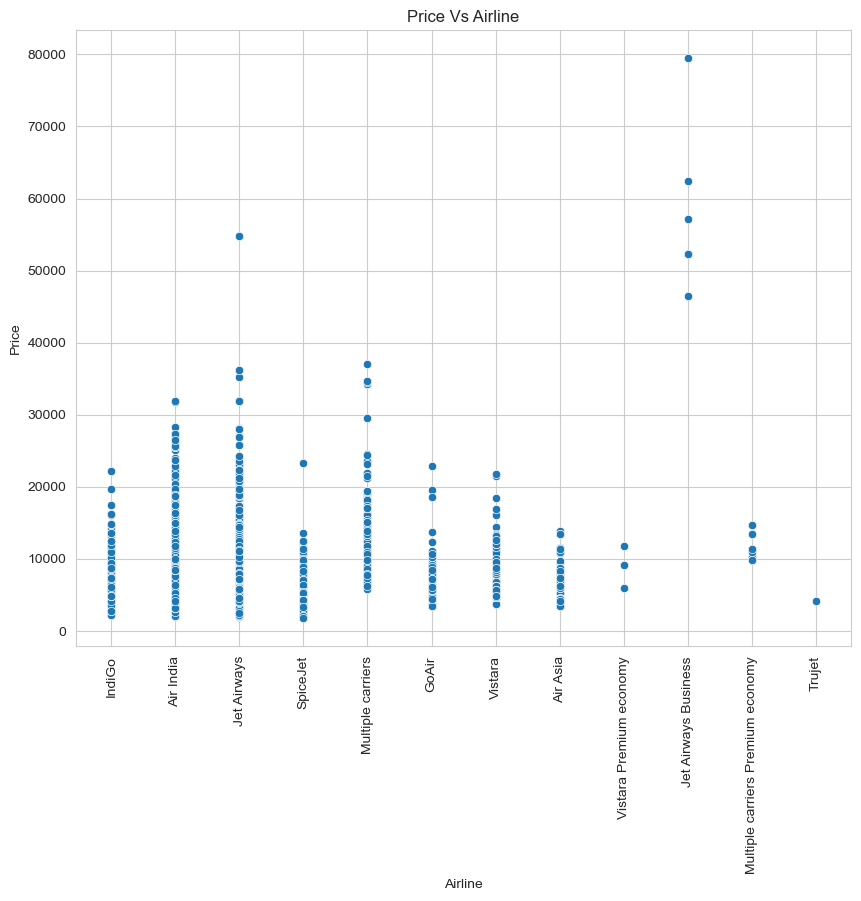

3. Prices wrt Duration - Prices tend to just slightly increase wrt to duration and seem to fairly consistent even if flight time increases

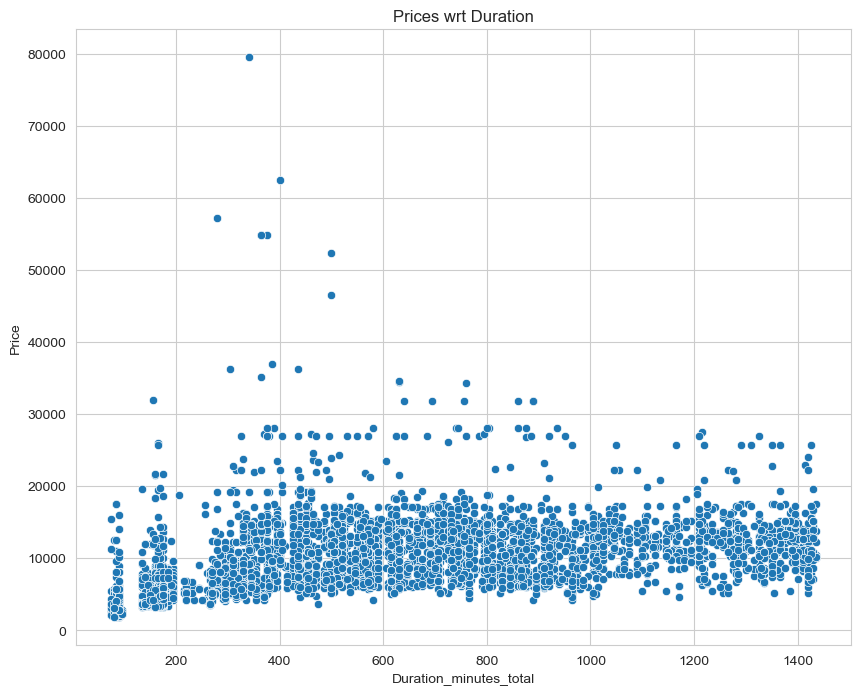

5. Prices vs Source - Prices from mumbai start a bit lower and Bangalore has the highest range of prices. Chennai has less range of prices

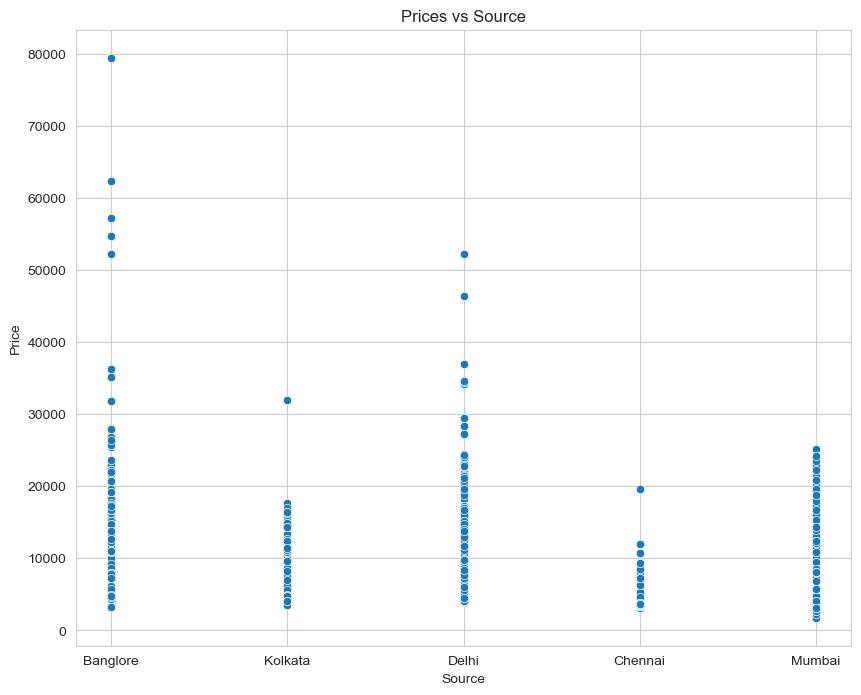 

6. Prices vs total stops - As the stops increase the prices increase. So non stop flights are cheaper than with stops

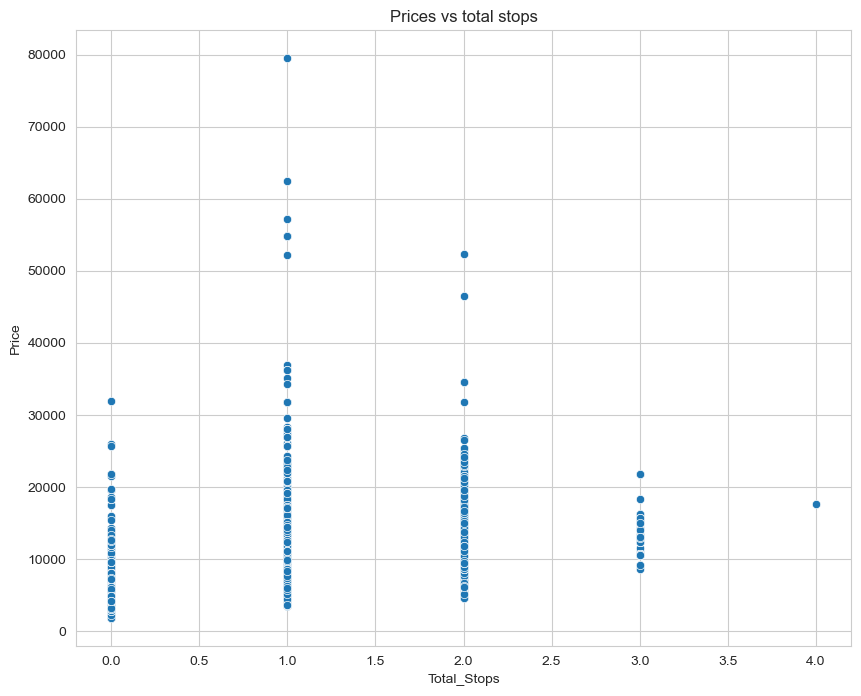



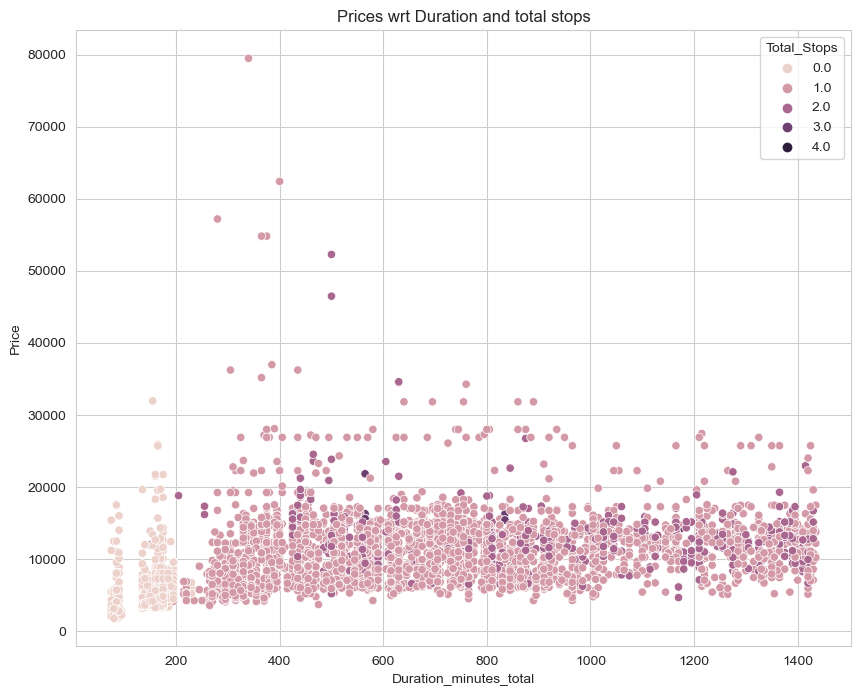

In [213]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Duration_minutes_total', y='Price', data=flight_df,
               hue='Total_Stops')
plt.title("Prices wrt Duration and total stops")
plt.show()

## Google Playstore:

### Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

In [457]:
playstore_df = pd.read_csv("data/googleplaystore.csv")
rows, columns = flight_df.shape
print(f"Dimensions of flight dataset : {flight_df.shape}")
print(f"Number of rows in flight dataset : {rows}")
print(f"Number of columns  in flight dataset : {columns}")

Dimensions of flight dataset : (10683, 13)
Number of rows in flight dataset : 10683
Number of columns  in flight dataset : 13


### Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

In [458]:
playstore_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

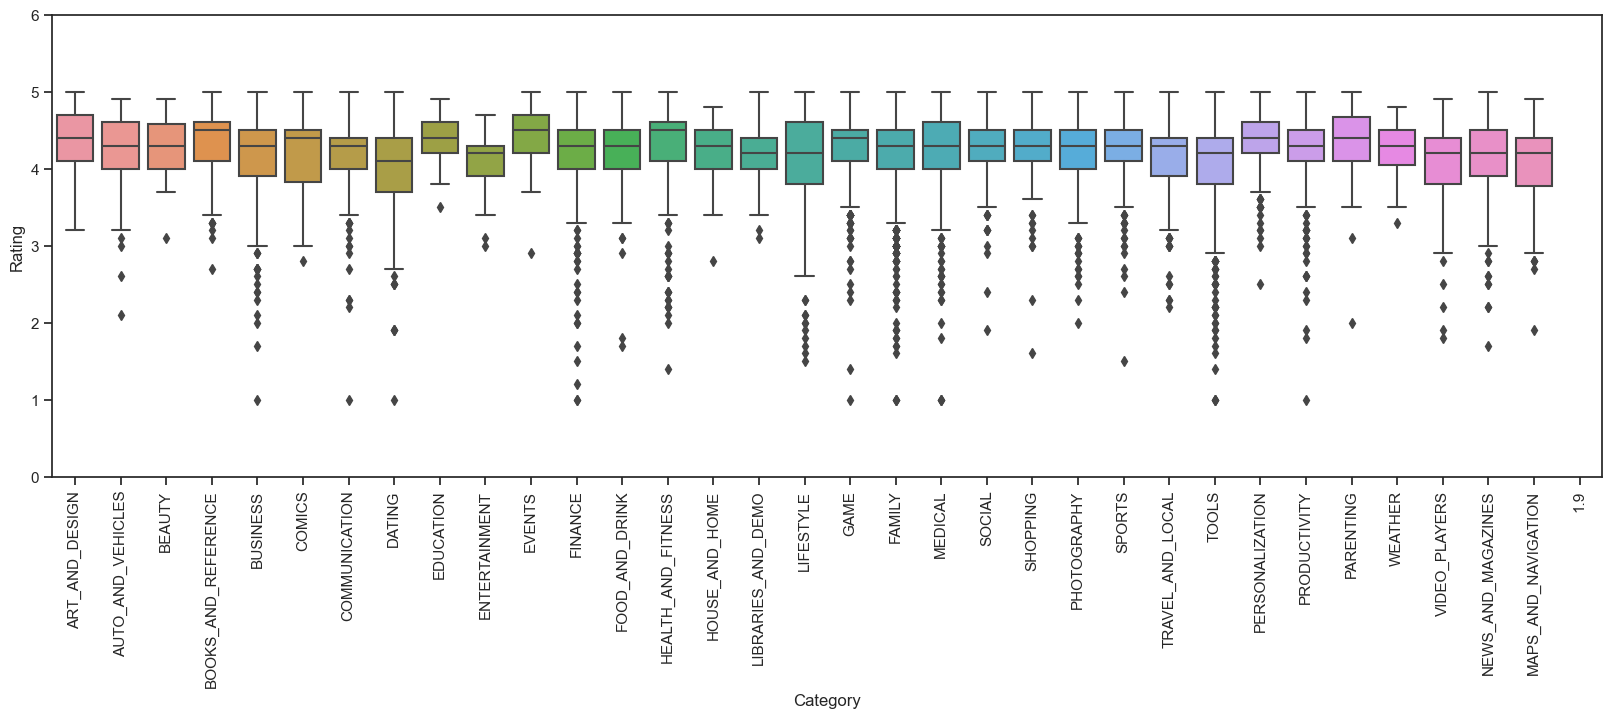

In [459]:
plt.figure(figsize=(20,6))
sns.boxplot(x='Category',y='Rating', data=playstore_df)
plt.ylim(0, 6)
plt.xticks(rotation=90)
plt.show()

### Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

Ways missing values can impact your analysis:

1. Biased results: If the missing values are not handled properly, they can result in biased or inaccurate results. This can happen because missing values can lead to reduced sample sizes, which can affect the representativeness of the sample and, therefore, the accuracy of the results.

2. Distorted distributions: Missing values can distort the distribution of the data, particularly if they are not missing at random. For example, if the missing values are concentrated in a particular range of the data, this can skew the distribution of the remaining data.

3. Reduced statistical power: Missing values can also reduce the statistical power of the analysis. This is because missing data reduces the sample size and, therefore, the ability to detect statistically significant effects.

4. Incorrect estimates: If missing values are simply ignored, this can result in incorrect estimates of the parameters of the model. For example, if missing values are imputed using a mean or median value, this can lead to biased estimates of the mean or median of the population.

In [460]:
playstore_df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

In [461]:
playstore_df['Size'].sample(20,random_state=123)

6603                  613k
9050                   21M
9701                  8.8M
97                    4.5M
6685                  2.6M
2310                  7.4M
3568                   11M
6389                  2.1M
298                   4.9M
628                   8.0M
546                   9.4M
4583                  3.7M
1248    Varies with device
2694                   20M
2989                   31M
9356                   46M
5613    Varies with device
5230                  2.8M
4577                   37M
2257                  5.8M
Name: Size, dtype: object

In [462]:
def convert_size_to_num(x):
    x=str(x)
    if x=='Varies with device':
            return np.nan
    elif 'M' in x:
        return float(x.replace('M', '')) * 1000000
    elif 'k' in x:
        return float(x.replace('k', '')) * 1000
    elif ',' and '+' in x:
        x=x.replace(',','')
        x=x.replace('+','')
        return float(x)
    elif ','  in x:
        return float(x.replace(',',''))
    elif '+'  in x:
        return float(x.replace('+',''))
    else:
        return float(x)

In [463]:
playstore_df['Size'] = playstore_df['Size'].apply(convert_size_to_num)

In [464]:
playstore_df['Size'].sample(20,random_state=123)

6603      613000.0
9050    21000000.0
9701     8800000.0
97       4500000.0
6685     2600000.0
2310     7400000.0
3568    11000000.0
6389     2100000.0
298      4900000.0
628      8000000.0
546      9400000.0
4583     3700000.0
1248           NaN
2694    20000000.0
2989    31000000.0
9356    46000000.0
5613           NaN
5230     2800000.0
4577    37000000.0
2257     5800000.0
Name: Size, dtype: float64

In [465]:
playstore_df[playstore_df['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,1000.0,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


##### We have an outlier so we will remove this

In [466]:
# select rows where Rating is greater than 5
rating_greater_than_5 = playstore_df[playstore_df['Rating'] > 5]

# get the index values of the selected rows
rows_to_drop = rating_greater_than_5.index

# drop the selected rows from the dataframe
playstore_df = playstore_df.drop(rows_to_drop)


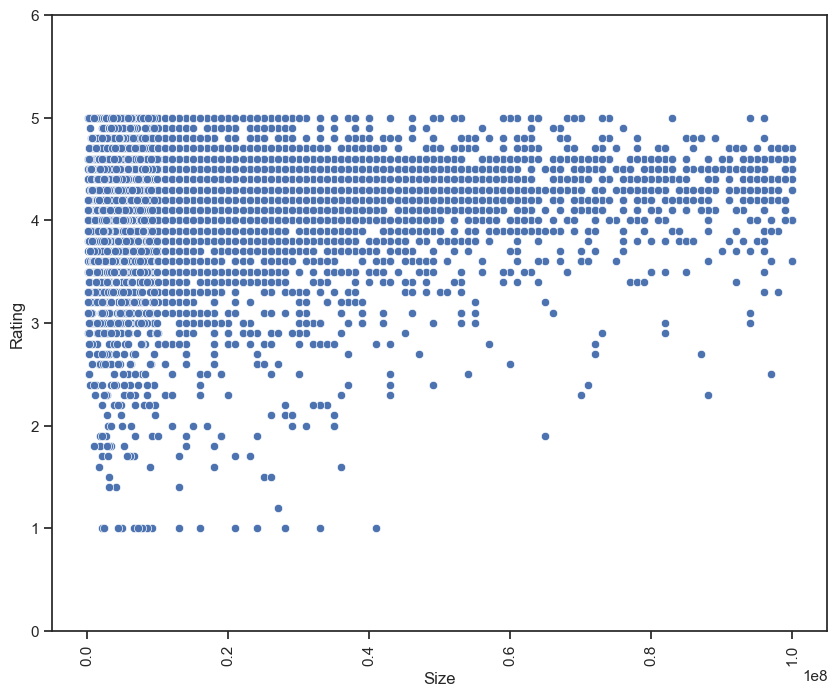

In [467]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Size', y='Rating', data=playstore_df)
plt.ylim(0,6)
plt.xticks(rotation=90)
plt.xticks()
plt.show()

<Figure size 1000x800 with 0 Axes>

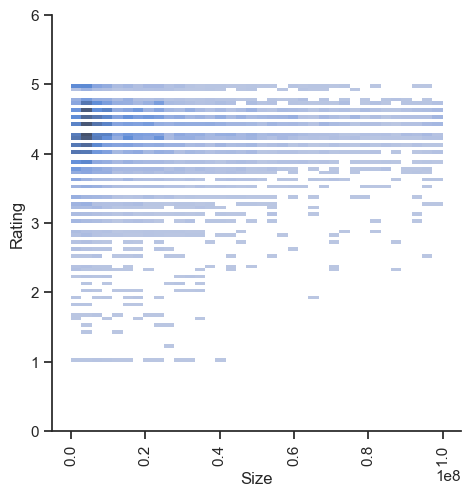

In [468]:
plt.figure(figsize=(10,8))
sns.displot(x='Size',y='Rating', data=playstore_df)
plt.ylim(0,6)
plt.xticks(rotation=90)
plt.xticks()
plt.show()

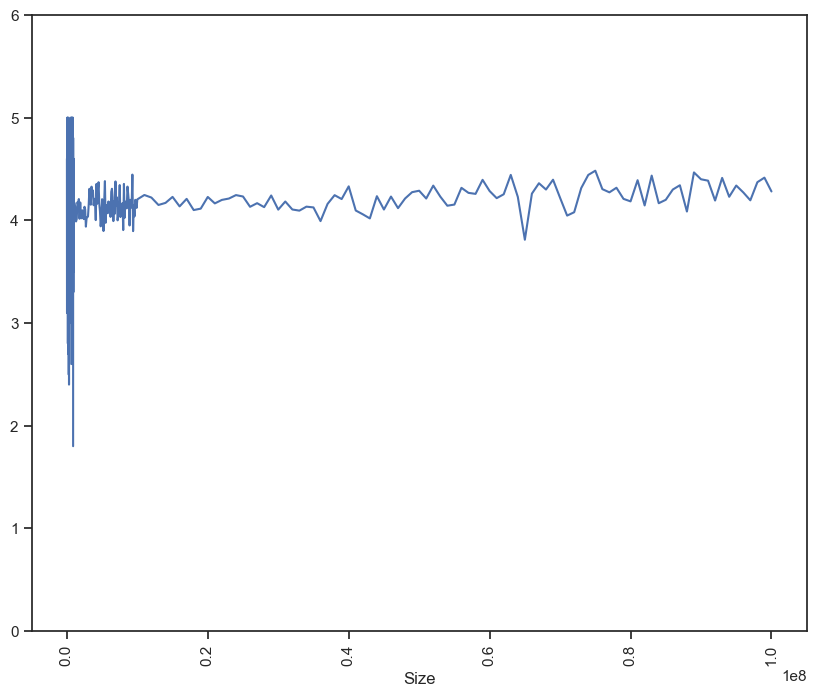

In [469]:
plt.figure(figsize=(10,8))
playstore_df.groupby('Size')['Rating'].mean().plot(kind='line')
plt.ylim(0,6)
plt.xticks(rotation=90)
plt.xticks()
plt.show()

As we can see from the above graphs the ratings seems to be same and doesnt increase or decrease based on the size of the app

### Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

In [470]:
playstore_df['Category'].unique()


array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [471]:
playstore_df['Price'] = playstore_df['Price'].apply(lambda x : float(x.replace('$','')))

In [472]:
playstore_df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

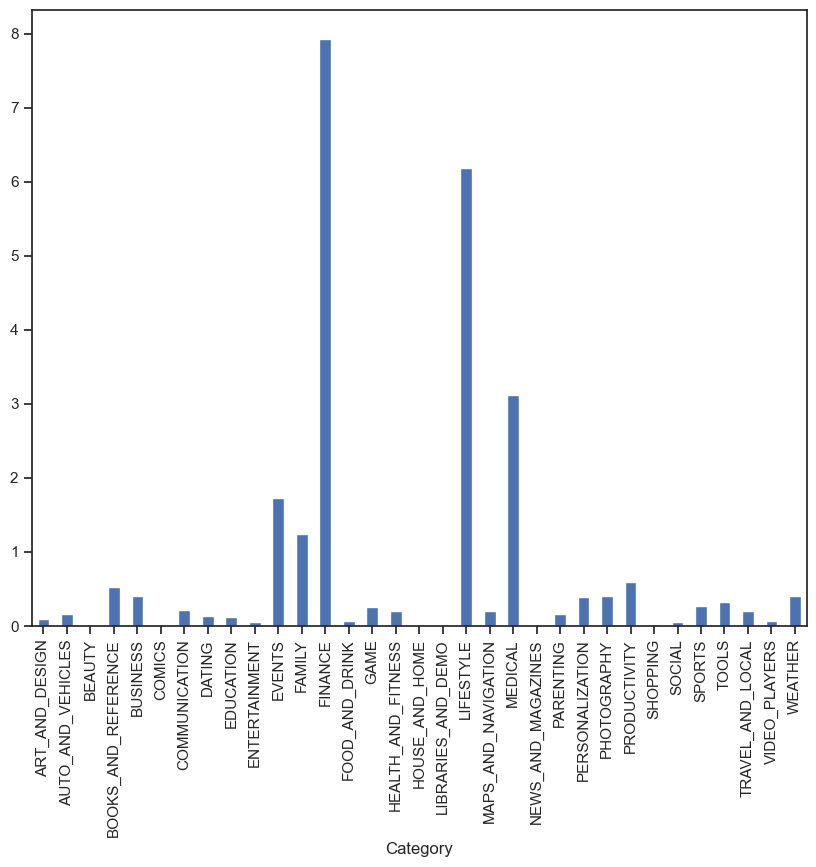

In [473]:
plt.figure(figsize=(10,8))
playstore_df.groupby('Category')['Price'].mean().plot(kind='bar')
plt.xticks(rotation=90)
plt.xticks()
plt.show()

Finance, Lifestyle, Medical, Events and Family seems to be top 5 most expensive app categories

### Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

In [474]:
playstore_df[['App','Installs']]

,App,Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,"10,000+"
1,Coloring book moana,"500,000+"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...","5,000,000+"
3,Sketch - Draw & Paint,"50,000,000+"
4,Pixel Draw - Number Art Coloring Book,"100,000+"
...,...,...
10836,Sya9a Maroc - FR,"5,000+"
10837,Fr. Mike Schmitz Audio Teachings,100+
10838,Parkinson Exercices FR,"1,000+"
10839,The SCP Foundation DB fr nn5n,"1,000+"


In [475]:
playstore_df['Installs'] = playstore_df['Installs'].apply(lambda x:x.replace(",",''))
playstore_df['Installs'] = playstore_df['Installs'].apply(lambda x:x.replace("+",''))
playstore_df['Installs'] = playstore_df['Installs'].apply(lambda x:int(x))

In [477]:
playstore_df[['App','Installs']]

,App,Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,10000
1,Coloring book moana,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",5000000
3,Sketch - Draw & Paint,50000000
4,Pixel Draw - Number Art Coloring Book,100000
...,...,...
10836,Sya9a Maroc - FR,5000
10837,Fr. Mike Schmitz Audio Teachings,100
10838,Parkinson Exercices FR,1000
10839,The SCP Foundation DB fr nn5n,1000


In [476]:
playstore_df[['App','Installs']].sort_values('Installs',ascending=False).head(10)

,App,Installs
3896,Subway Surfers,1000000000
3943,Facebook,1000000000
335,Messenger – Text and Video Chat for Free,1000000000
3523,Google Drive,1000000000
3565,Google Drive,1000000000
2884,Google Photos,1000000000
3665,YouTube,1000000000
2853,Google Photos,1000000000
4234,Skype - free IM & video calls,1000000000
3687,Google Play Movies & TV,1000000000


##### We seem to have duplicated values we will remove it 

In [479]:
playstore_df.duplicated().sum()

483

In [485]:
playstore_df.drop_duplicates(inplace=True)

In [486]:
playstore_df.duplicated().sum()

0

In [487]:
playstore_df[['App','Installs']].sort_values('Installs',ascending=False).head(10)

,App,Installs
341,Hangouts,1000000000
3928,YouTube,1000000000
451,Gmail,1000000000
3996,Google Chrome: Fast & Secure,1000000000
1700,Subway Surfers,1000000000
3454,Google Drive,1000000000
2808,Google Photos,1000000000
865,Google Play Games,1000000000
2853,Google Photos,1000000000
411,Google Chrome: Fast & Secure,1000000000


We still have duplicated values, so we will make a copy of the df, and make app as the index and then get the app names

In [493]:
playstore_df1 = playstore_df.copy()

In [494]:
playstore_df1 = playstore_df1.set_index('App')

In [495]:
playstore_df1.duplicated().sum()

9

In [496]:
playstore_df1.drop_duplicates(inplace=True)

In [497]:
playstore_df1.duplicated().sum()

0

In [502]:
playstore_df1['Installs'].sort_values(ascending=False).head(10)

App
YouTube                         1000000000
Subway Surfers                  1000000000
Gmail                           1000000000
Maps - Navigate & Explore       1000000000
Google                          1000000000
Subway Surfers                  1000000000
Google Photos                   1000000000
Google Chrome: Fast & Secure    1000000000
Subway Surfers                  1000000000
Google Play Games               1000000000
Name: Installs, dtype: int64

### Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

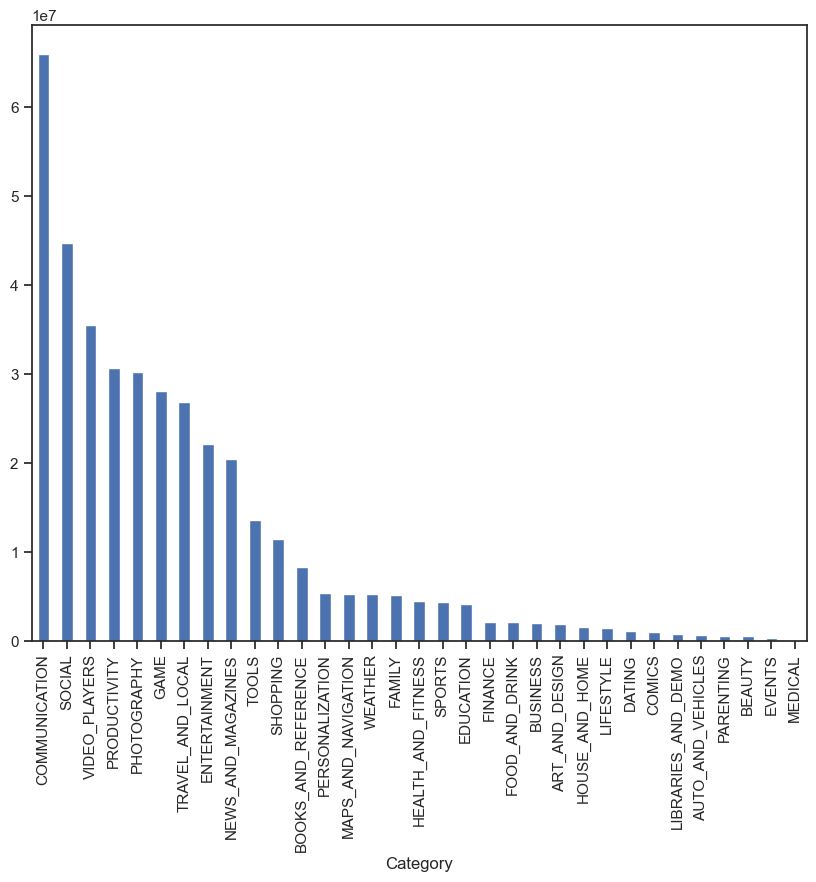

In [510]:
plt.figure(figsize=(10,8))
playstore_df.groupby('Category')['Installs'].mean().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=90)
plt.xticks()
plt.show()

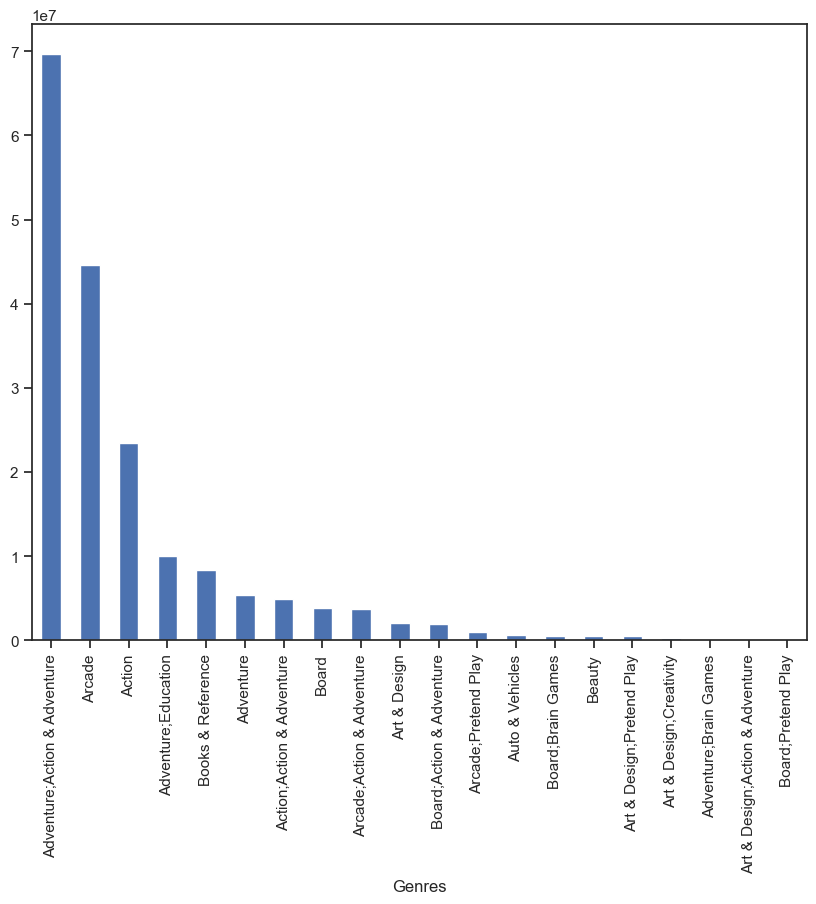

In [515]:
plt.figure(figsize=(10,8))
playstore_df.groupby('Genres')['Installs'].mean().head(20).sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=90)
plt.xticks()
plt.show()

### Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify themost successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?


To identify the most successful app developers in the Google Playstore dataset, there are several features that can be analyzed:

1. App ratings: The average rating of an app can indicate how satisfied users are with the app. Higher ratings could mean that users are more likely to download and use the app.

2. Number of installs: The number of downloads an app has can indicate how popular it is among users. A higher number of installs could mean that the app is more successful.

3. Reviews: The number of reviews an app has can indicate how engaged users are with the app. A higher number of reviews could mean that users are more likely to provide feedback and suggest improvements.

4. Price: The price of an app could be a factor in its success. Analyzing the prices of successful apps could help the company determine the optimal price range for their own apps.

5. Genre: Analyzing the most successful app genres could help the company identify which types of apps are most popular among users.

To present the findings, data visualizations could be used to make the information more digestible and easy to understand. Here are a few examples:

1. Scatter plot: A scatter plot could be used to visualize the relationship between app ratings and number of installs. This could help identify which apps have high ratings and a large number of installs.

2. Bar chart: A bar chart could be used to compare the number of reviews for different app developers. This could help identify which developers have the most engaged user base.

3. Pie chart: A pie chart could be used to visualize the distribution of successful app genres. This could help identify which app genres are most popular among users.

4. Heat map: A heat map could be used to visualize the relationship between app prices and number of installs. This could help identify which price ranges are most successful for apps.

### Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

To identify the best time to launch a new app, there are several features that can be analyzed:

1. App releases: The number of new app releases over time can indicate when there are peaks or lulls in app launches. Analyzing this trend could help the company identify the best time to launch a new app.

2. User engagement: The number of active users over time can indicate when users are most likely to engage with apps. Analyzing this trend could help the company identify when users are most likely to be receptive to new app releases.

3. Seasonal trends: Certain types of apps may be more popular during certain seasons. Analyzing the popularity of app genres over time could help the company identify seasonal trends in app usage.

4. Competition: Analyzing the app releases of competitors could help the company identify when it is best to launch a new app to avoid competition.

To present the findings, data visualizations could be used to make the information more digestible and easy to understand. Here are a few examples:

1. Line chart: A line chart could be used to visualize the trend in app releases over time. This could help identify when there are peaks or lulls in app launches.

2. Heat map: A heat map could be used to visualize the popularity of app genres over time. This could help identify seasonal trends in app usage.

3. Bar chart: A bar chart could be used to compare the number of new app releases from competitors over time. This could help identify when it is best to launch a new app to avoid competition.

4. Scatter plot: A scatter plot could be used to visualize the relationship between user engagement and time of day or day of the week. This could help identify when users are most likely to engage with apps.

5. Line chart: To visualize the trend in app releases over time, you can create a line chart with Last Updated on the x-axis and the number of apps released on the y-axis. This can be done using the following code:

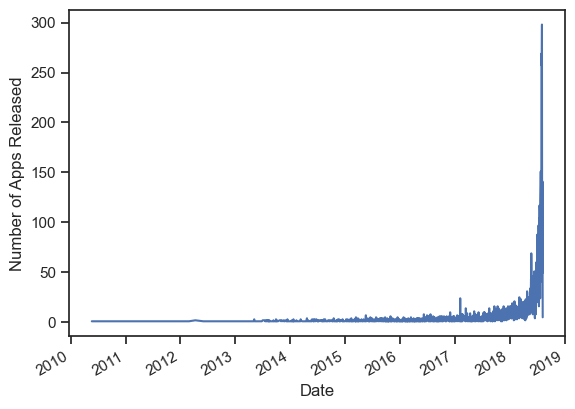

In [516]:
playstore_df['Last Updated'] = pd.to_datetime(playstore_df['Last Updated'])

# group by date and count the number of apps released
playstore_df.groupby('Last Updated')['App'].count().plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Number of Apps Released')
plt.show()

In [523]:
playstore_df['Reviews']=playstore_df['Reviews'].apply(lambda x:int(x))

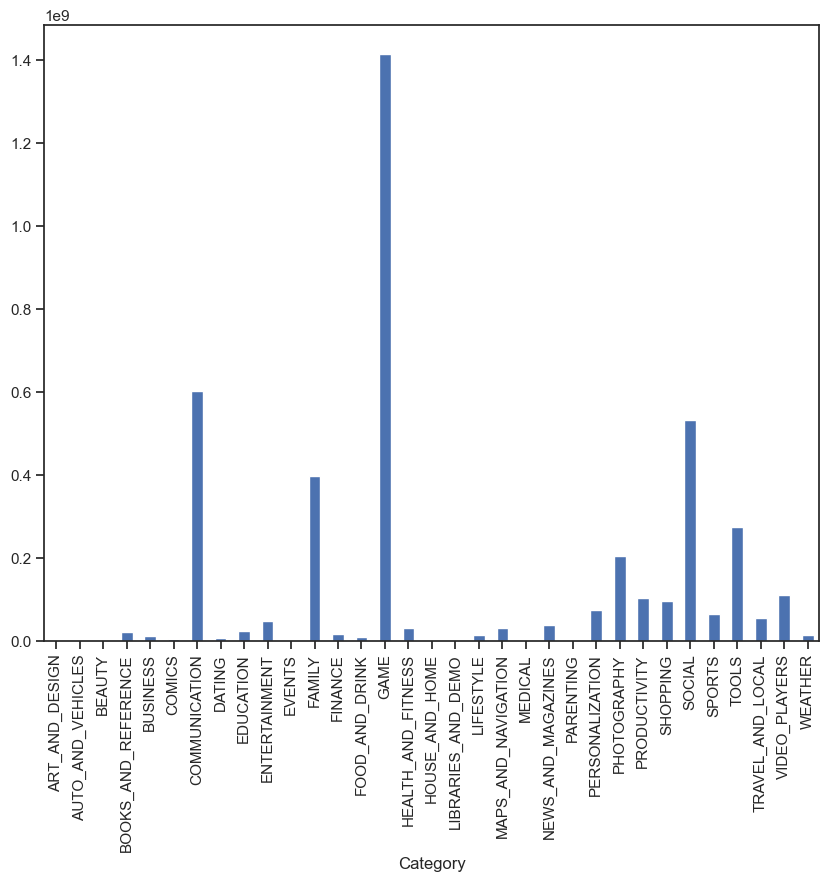

In [524]:
plt.figure(figsize=(10,8))
playstore_df.groupby('Category')['Reviews'].sum().plot(kind='bar')
plt.xticks(rotation=90)
plt.xticks()
plt.show()

In [517]:
playstore_df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


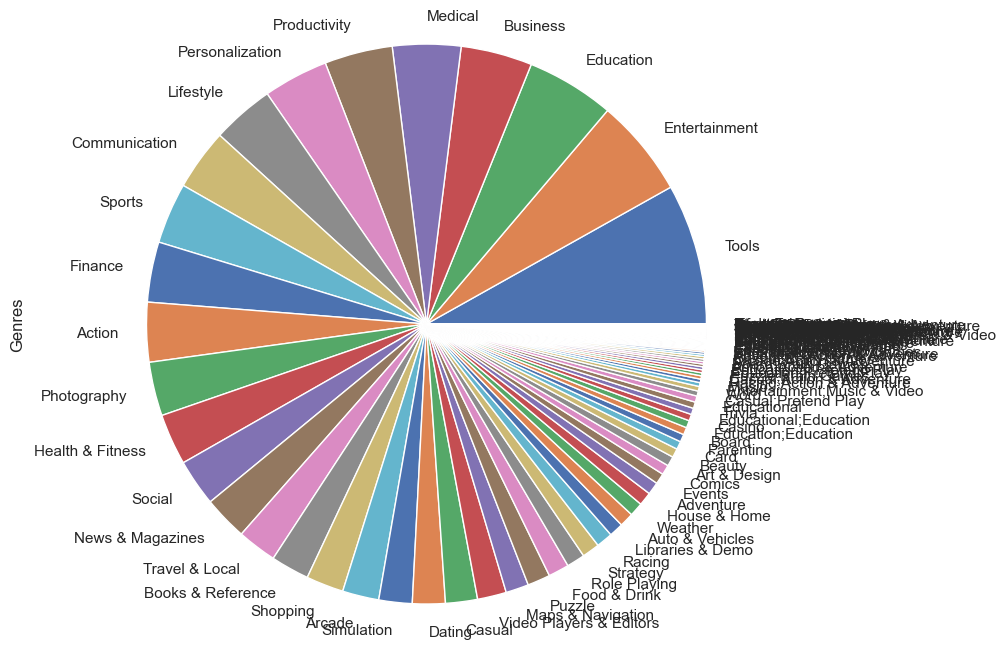

In [527]:
plt.figure(figsize=(10,8))
playstore_df['Genres'].value_counts().plot(kind='pie')

plt.axis('equal')

plt.xticks()
plt.show()